## Installing the dependencies

In [1]:
pip install kaggle

In [4]:
!kaggle datasets download -d amirmotefaker/supply-chain-dataset

Dataset URL: https://www.kaggle.com/datasets/amirmotefaker/supply-chain-dataset
License(s): other
  0% 0.00/9.12k [00:00<?, ?B/s]
100% 9.12k/9.12k [00:00<00:00, 13.8MB/s]


In [5]:
!unzip supply-chain-dataset.zip

Archive:  supply-chain-dataset.zip
  inflating: supply_chain_data.csv   


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
plt.style.use('ggplot')
sns.set_palette("Set1")
plt.rcParams['figure.figsize'] = (12, 6)

In [7]:
df = pd.read_csv('supply_chain_data.csv')

## Basic  overview of the data

In [8]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [12]:
df.isnull().sum()

,0
Product type,0
SKU,0
Price,0
Availability,0
Number of products sold,0
Revenue generated,0
Customer demographics,0
Stock levels,0
Lead times,0
Order quantities,0


In [14]:
df.duplicated().sum()

0

In [16]:
df.describe().drop('count', axis = 0)

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [10]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [17]:
numerical_features = [features for features in df.columns if df[features].dtype != 'O']
categorical_features = [features for features in df.columns if features not in numerical_features]

In [18]:
print(f"Numerical features in the data are: {numerical_features}")
print(f"Categorical features in the data are: {categorical_features}")

Numerical features in the data are: ['Price', 'Availability', 'Number of products sold', 'Revenue generated', 'Stock levels', 'Lead times', 'Order quantities', 'Shipping times', 'Shipping costs', 'Lead time', 'Production volumes', 'Manufacturing lead time', 'Manufacturing costs', 'Defect rates', 'Costs']
Categorical features in the data are: ['Product type', 'SKU', 'Customer demographics', 'Shipping carriers', 'Supplier name', 'Location', 'Inspection results', 'Transportation modes', 'Routes']


## EDA

### Product type

In [19]:
df['Product type'].value_counts()

,count
Product type,
skincare,40
haircare,34
cosmetics,26


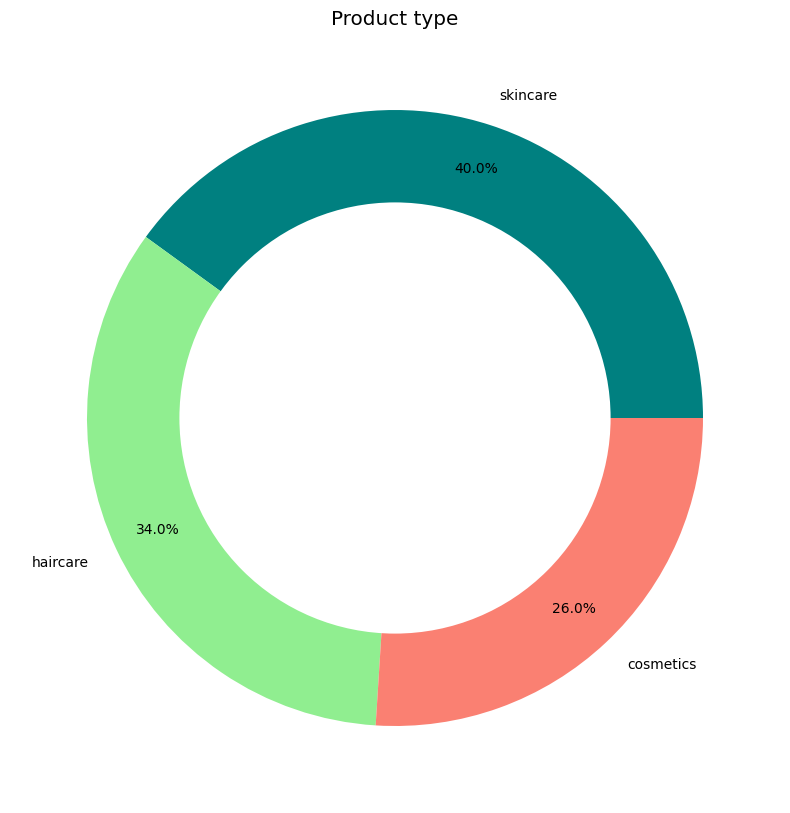

In [29]:
plt.figure(figsize = (10,10))
plt.pie(df['Product type'].value_counts(), labels = df['Product type'].value_counts().index, autopct = '%1.1f%%', pctdistance=0.85, colors = ['teal', 'lightgreen', 'salmon'])
plt.title('Product type')

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.savefig('Product_type.png')
plt.show()

 So, about 40% of business comes from skincare products


In [137]:
avg_lead_time = df.groupby('Product type')['Lead time'].mean().reset_index()
avg_manufacturing_costs = df.groupby('Product type')['Manufacturing costs'].mean().reset_index()
avg_defect_rate = df.groupby('Product type')['Defect rates'].mean().reset_index()
result = pd.merge(avg_lead_time, avg_manufacturing_costs, on='Product type')
result = pd.merge(result, avg_defect_rate, on='Product type')
result.rename(columns={'Lead time': 'Average Lead Time', 'Manufacturing costs': 'Average Manufacturing Costs'}, inplace=True)
print(result)

  Product type  Average Lead Time  Average Manufacturing Costs  Defect rates
0    cosmetics          13.538462                    43.052740      1.919287
1     haircare          18.705882                    48.457993      2.483150
2     skincare          18.000000                    48.993157      2.334681


<ipython-input-66-d5777fc98b8e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = result, x = 'Product type', y = 'Average Lead Time', palette = ['teal', 'lightgreen', 'salmon'])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_bas

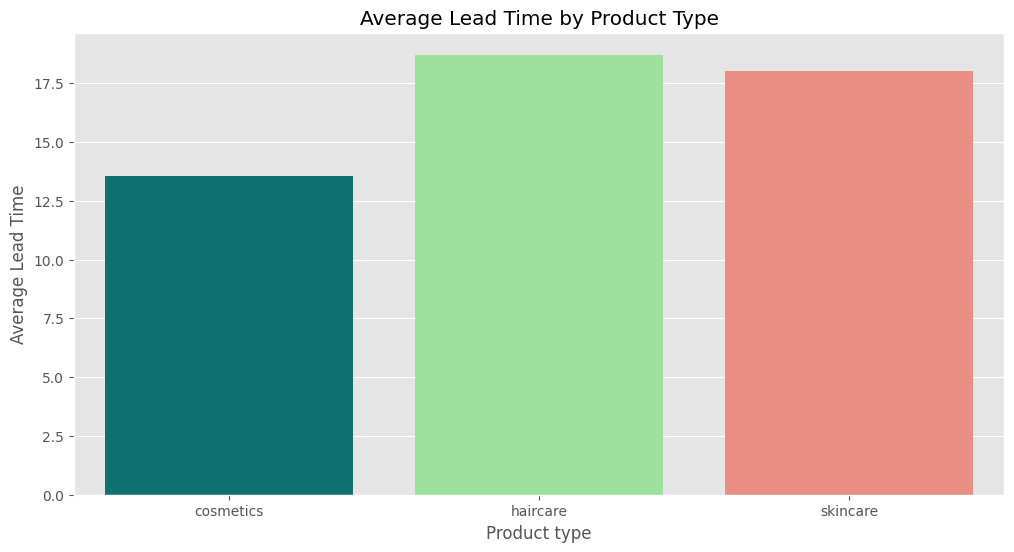

In [66]:
sns.barplot(data = result, x = 'Product type', y = 'Average Lead Time', palette = ['teal', 'lightgreen', 'salmon'])
plt.title('Average Lead Time by Product Type')
plt.savefig('Average_lead_time_for_product_type.png')
plt.show()

<ipython-input-139-456158c0be00>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = result, x = 'Product type', y = 'Average Manufacturing Costs', palette = ['teal', 'lightgreen', 'salmon'])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/s

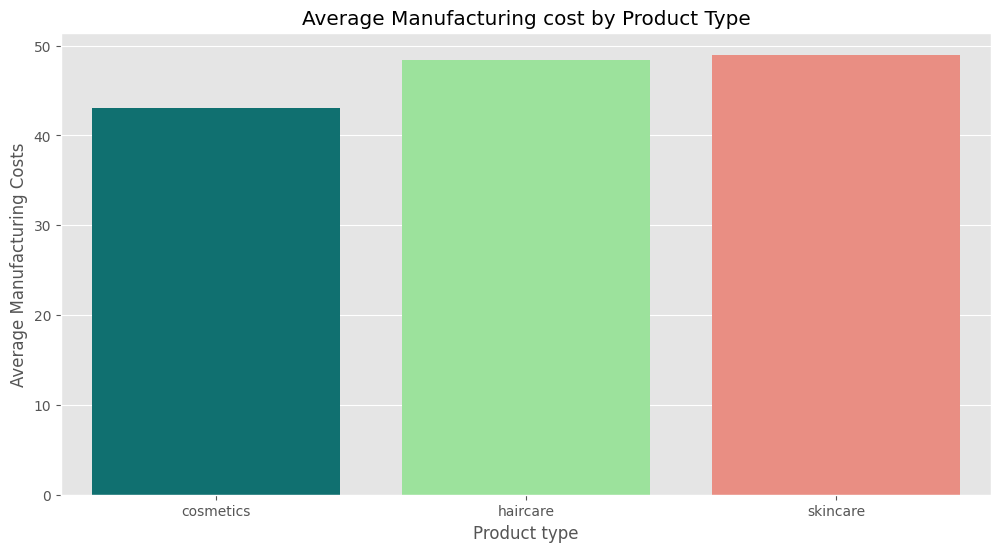

In [139]:
sns.barplot(data = result, x = 'Product type', y = 'Average Manufacturing Costs', palette = ['teal', 'lightgreen', 'salmon'])
plt.title('Average Manufacturing cost by Product Type')
plt.savefig('Average_manufacture_cost_for_product_type.png')
plt.show()

Even though skin care is giving the company high business, it has the highest average manufacturing cost and also relatively higher lead time.


<ipython-input-140-9966b1570319>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = result, x = 'Product type', y = 'Defect rates', palette = ['teal', 'lightgreen', 'salmon'])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py

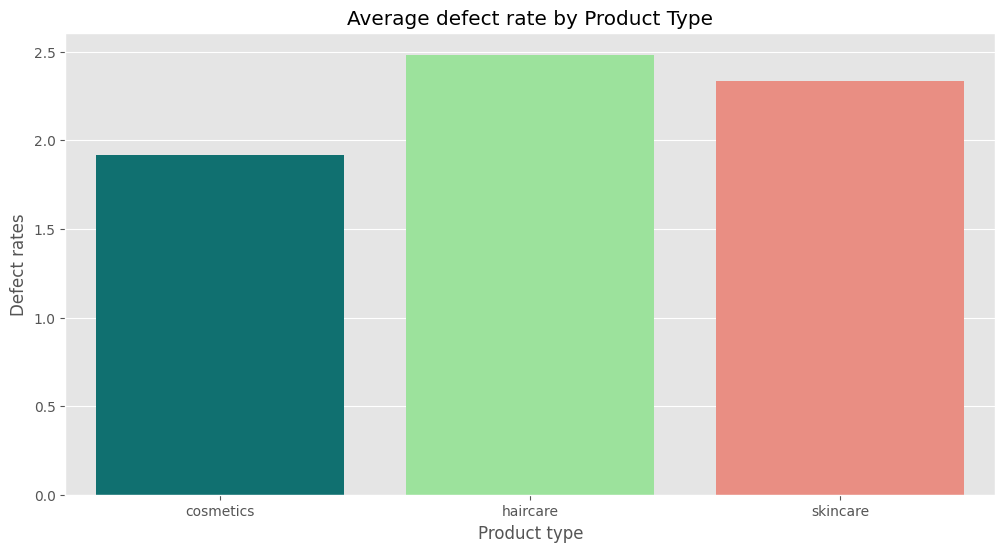

In [140]:
sns.barplot(data = result, x = 'Product type', y = 'Defect rates', palette = ['teal', 'lightgreen', 'salmon'])
plt.title('Average defect rate by Product Type')
plt.savefig('Average_defect_rate_for_product_type.png')
plt.show()

### Customer Demographics

In [37]:
df['Customer demographics'].head()

,Customer demographics
0,Non-binary
1,Female
2,Unknown
3,Non-binary
4,Non-binary


In [38]:
df['Customer demographics'].value_counts()

,count
Customer demographics,
Unknown,31
Female,25
Non-binary,23
Male,21


<ipython-input-42-a10a60585db0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Customer demographics', data = df, palette = ['lightgreen', 'salmon', 'teal', 'purple'])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949

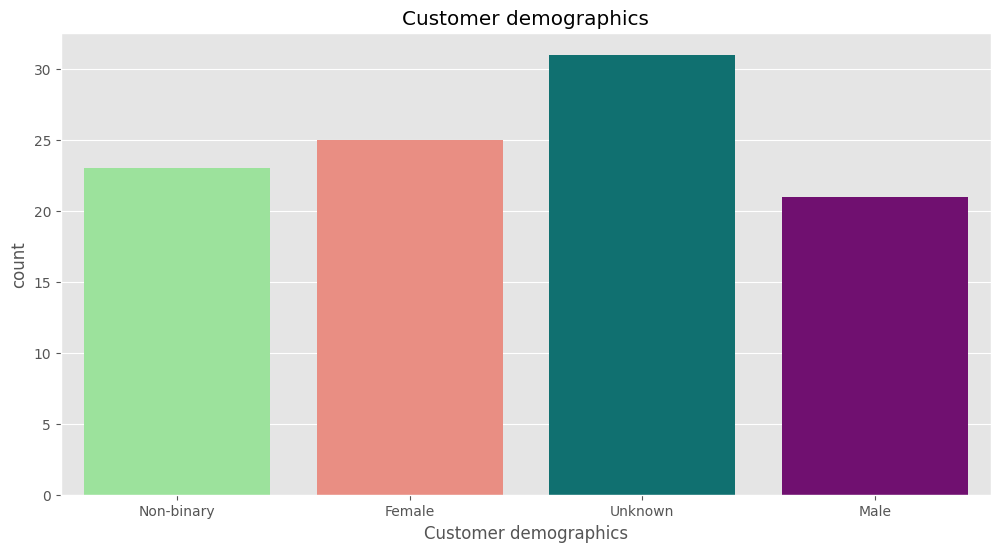

In [42]:
sns.countplot(x = 'Customer demographics', data = df, palette = ['lightgreen', 'salmon', 'teal', 'purple'])
plt.title('Customer demographics')
plt.savefig('Customer_demographics.png')
plt.show()

In [47]:
df.groupby('Customer demographics')['Product type'].value_counts()

Customer demographics  Product type
Female                 skincare        13
                       cosmetics       10
                       haircare         2
Male                   haircare        10
                       skincare         7
                       cosmetics        4
Non-binary             skincare        11
                       haircare         7
                       cosmetics        5
Unknown                haircare        15
                       skincare         9
                       cosmetics        7
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


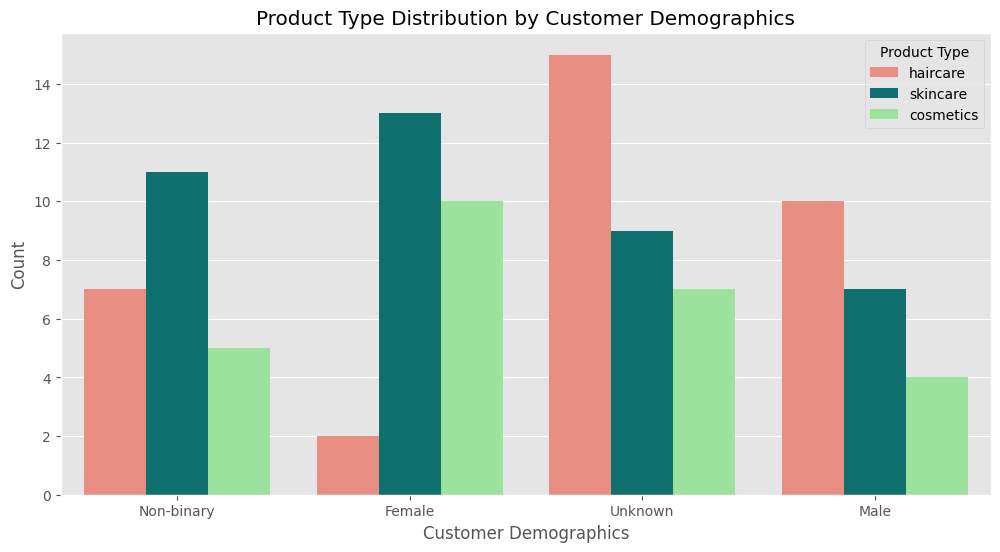

In [50]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Customer demographics', hue='Product type', data=df, palette = ['salmon', 'teal', 'lightgreen'])
plt.title('Product Type Distribution by Customer Demographics')
plt.xlabel('Customer Demographics')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Product Type')

plt.savefig('Product_type_distribution_among_Customer_Demographics.png')
plt.show()

### Shipping carrier

In [53]:
df['Shipping carriers'].head()

,Shipping carriers
0,Carrier B
1,Carrier A
2,Carrier B
3,Carrier C
4,Carrier A


In [54]:
df['Shipping carriers'].value_counts()

,count
Shipping carriers,
Carrier B,43
Carrier C,29
Carrier A,28


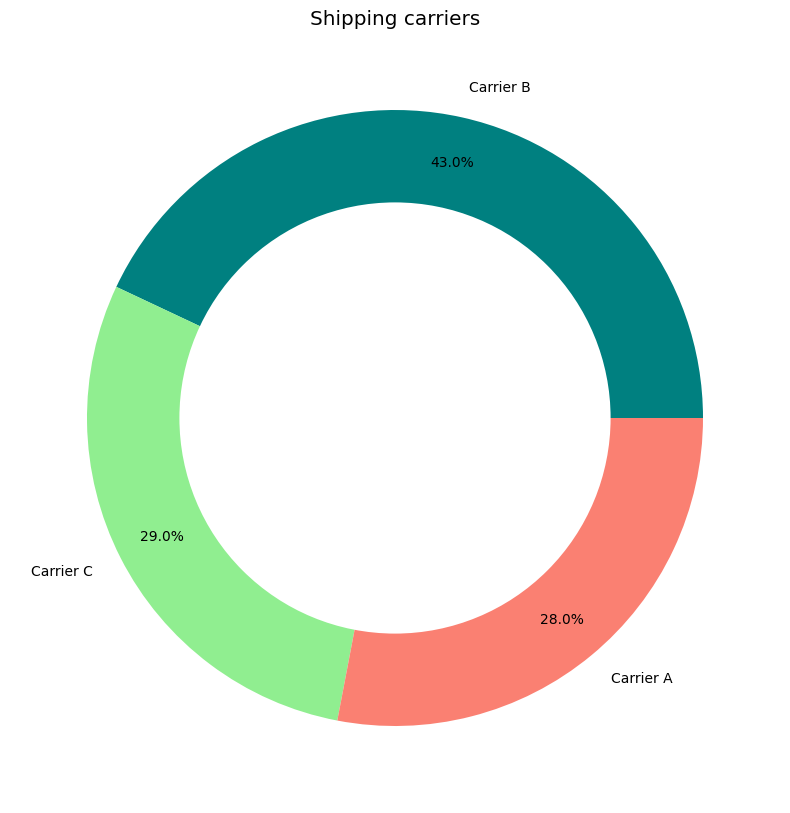

In [57]:
plt.figure(figsize = (10,10))
plt.pie(x = df['Shipping carriers'].value_counts(), labels = df['Shipping carriers'].value_counts().index, autopct = '%1.1f%%', pctdistance=0.85, colors = ['teal', 'lightgreen', 'salmon'])

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.title('Shipping carriers')
plt.savefig('Shipping_carriers.png')
plt.show()

In [60]:
revenue_by_carriers = df.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()

In [61]:
revenue_by_carriers

,Shipping carriers,Revenue generated
0,Carrier A,142629.994607
1,Carrier B,250094.646988
2,Carrier C,184880.177143


<ipython-input-62-b7597ea291c0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = revenue_by_carriers, x = 'Shipping carriers', y = 'Revenue generated', palette = ['teal', 'lightgreen', 'salmon'])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-pac

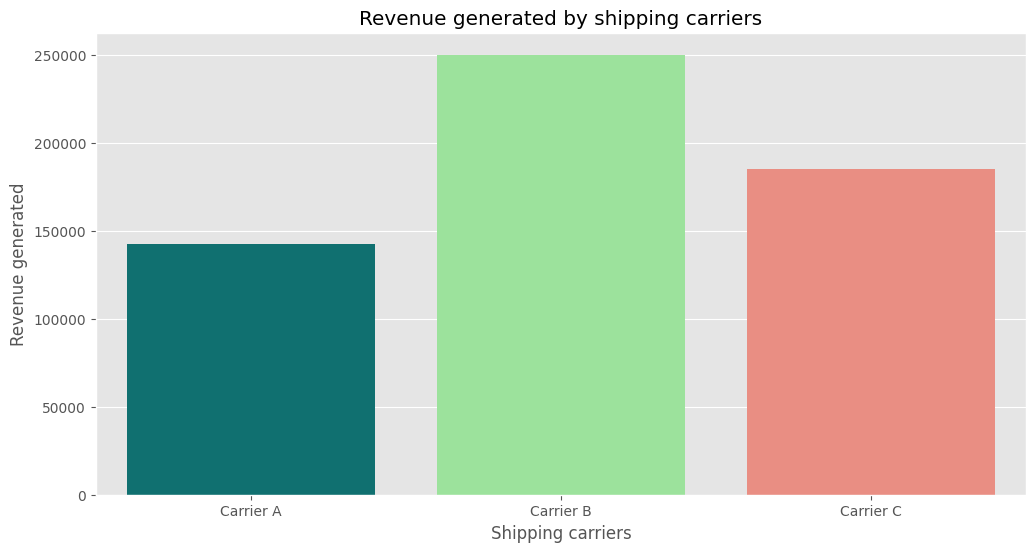

In [62]:
sns.barplot(data = revenue_by_carriers, x = 'Shipping carriers', y = 'Revenue generated', palette = ['teal', 'lightgreen', 'salmon'])
plt.title('Revenue generated by shipping carriers')
plt.savefig('Revenue_generated_by_shipping_carriers.png')
plt.show()

They use carrier B the most out of the three, nearly upto 45%. And the revenue generated is also highest from shipping carrier B.

In [124]:
shipping_cost_df = df.groupby('Shipping carriers')['Shipping costs'].sum().reset_index()

<ipython-input-125-7fb2f9a1b0bb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = shipping_cost_df, x = 'Shipping carriers', y = 'Shipping costs', palette = ['teal', 'lightgreen', 'salmon'])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages

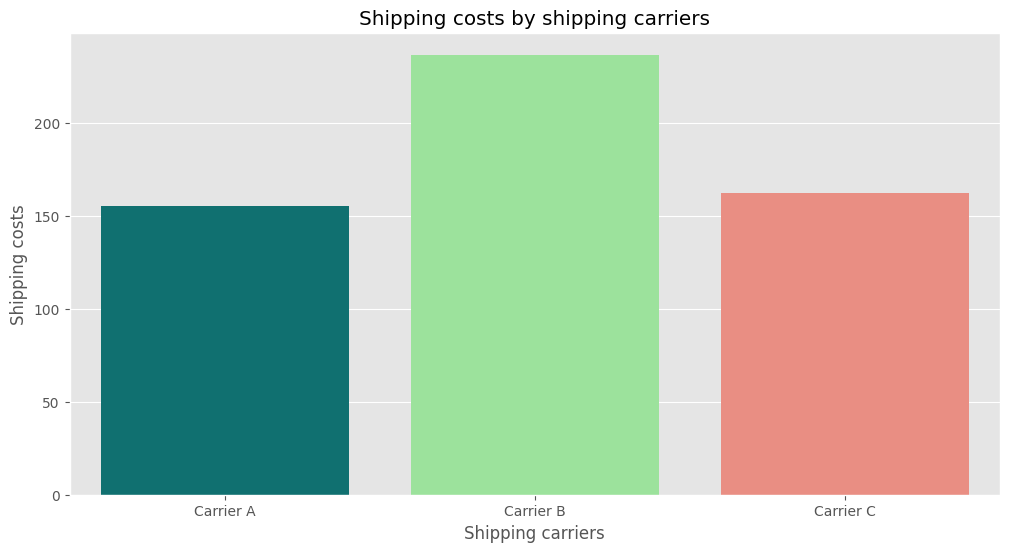

In [125]:
sns.barplot(data = shipping_cost_df, x = 'Shipping carriers', y = 'Shipping costs', palette = ['teal', 'lightgreen', 'salmon'])
plt.title('Shipping costs by shipping carriers')
plt.savefig('Shipping_costs_by_shipping_carriers.png')
plt.show()


In [70]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

### Suppliers

In [72]:
df['Supplier name'].value_counts()

,count
Supplier name,
Supplier 1,27
Supplier 2,22
Supplier 5,18
Supplier 4,18
Supplier 3,15


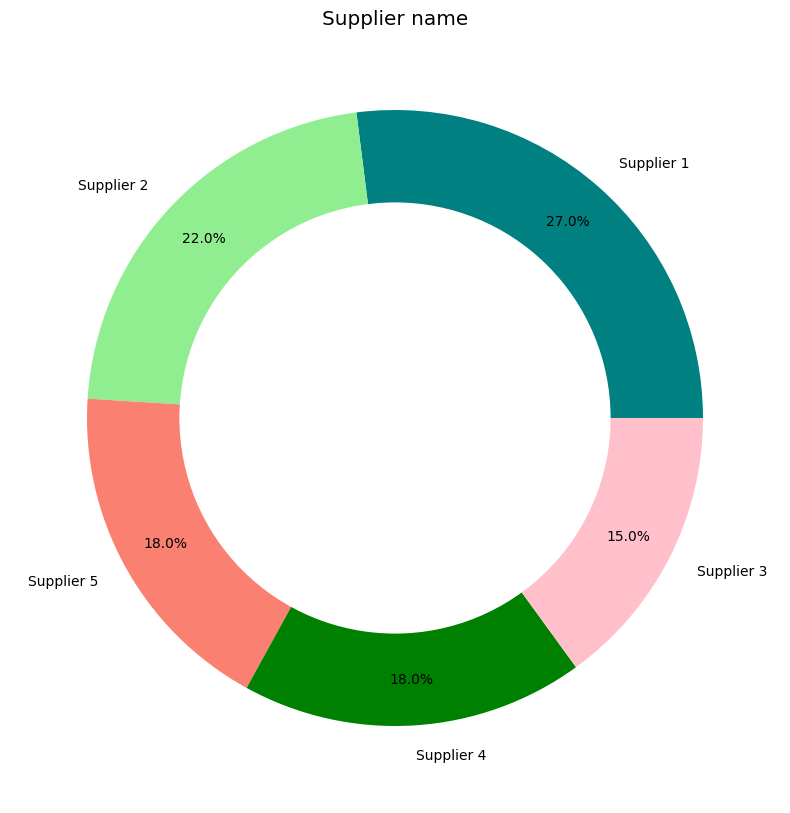

In [76]:
plt.figure(figsize = (10,10))
plt.pie(x = df['Supplier name'].value_counts(), labels = df['Supplier name'].value_counts().index, autopct = '%1.1f%%', pctdistance=0.85, colors = ['teal', 'lightgreen', 'salmon', 'green', 'pink'])

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.title('Supplier name')
plt.savefig('Suppliers.png')
plt.show()

In [77]:
revenue_by_supplier = df.groupby('Supplier name')['Revenue generated'].sum().reset_index()

In [78]:
revenue_by_supplier

,Supplier name,Revenue generated
0,Supplier 1,157528.995039
1,Supplier 2,125467.418605
2,Supplier 3,97795.979638
3,Supplier 4,86468.961799
4,Supplier 5,110343.463656


<ipython-input-79-abe48d5e75e8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = revenue_by_supplier, x = 'Supplier name', y = 'Revenue generated', palette = ['teal', 'lightgreen', 'salmon', 'green', 'pink'])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python

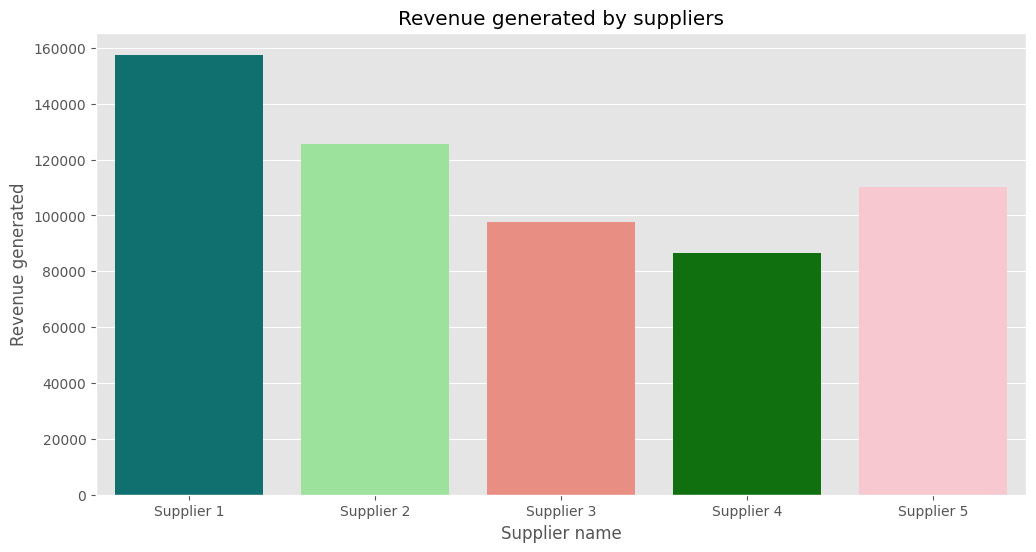

In [79]:
sns.barplot(data = revenue_by_supplier, x = 'Supplier name', y = 'Revenue generated', palette = ['teal', 'lightgreen', 'salmon', 'green', 'pink'])
plt.title('Revenue generated by suppliers')
plt.savefig('Revenue_generated_by_suppliers.png')
plt.show()

Supplier 1 generates the moost revenue among all the suppliers

In [81]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

### Location

In [82]:
df['Location'].value_counts()

,count
Location,
Kolkata,25
Mumbai,22
Chennai,20
Bangalore,18
Delhi,15


<ipython-input-83-80460ddb0688>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Location', data = df, palette = ['teal', 'lightgreen', 'salmon', 'purple'])
<ipython-input-83-80460ddb0688>:1: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x = 'Location', data = df, palette = ['teal', 'lightgreen', 'salmon', 'purple'])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, yo

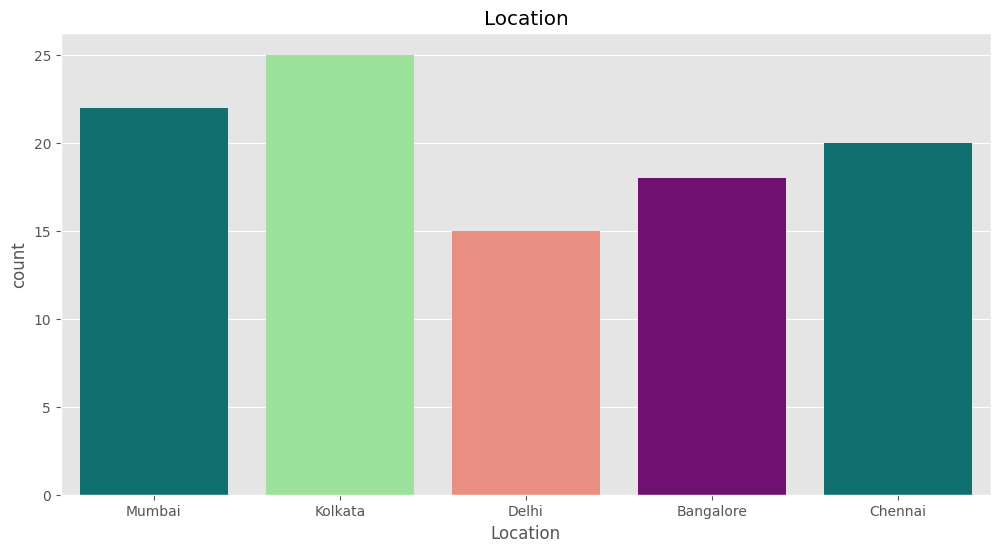

In [83]:
sns.countplot(x = 'Location', data = df, palette = ['teal', 'lightgreen', 'salmon', 'purple'])
plt.title('Location')
plt.savefig('Location.png')

Most orders are located from Kolkata

In [86]:
location_analysis = df.groupby('Location').agg({
    'Revenue generated': 'sum',
    'Order quantities': 'sum',
    'Defect rates': 'mean',
    'Lead time': 'mean',
    'Shipping costs': 'mean'
}).reset_index()

In [87]:
location_analysis = location_analysis.rename(columns={
    'Revenue generated': 'Total Revenue',
    'Order quantities': 'Total Order Quantity',
    'Defect rates': 'Average Defect Rate',
    'Lead time': 'Average Lead Time',
    'Shipping costs': 'Average Shipping Cost'
})

In [88]:
location_analysis

,Location,Total Revenue,Total Order Quantity,Average Defect Rate,Average Lead Time,Average Shipping Cost
0,Bangalore,102601.723882,769,2.093640,16.277778,5.748445
1,Chennai,119142.815748,1109,2.638256,18.650000,4.689079
2,Delhi,81027.701225,733,2.228639,14.600000,5.069881
3,Kolkata,137077.551005,1228,2.285766,19.440000,5.761414
4,Mumbai,137755.026877,1083,2.122339,15.318182,6.248989


<ipython-input-94-1d642b80746d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = location_analysis, x = 'Location', y = 'Total Revenue', palette = ['teal', 'lightgreen', 'salmon', 'purple'])
<ipython-input-94-1d642b80746d>:1: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data = location_analysis, x = 'Location', y = 'Total Revenue', palette = ['teal', 'lightgreen', 'salmon', 'purple'])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_bas

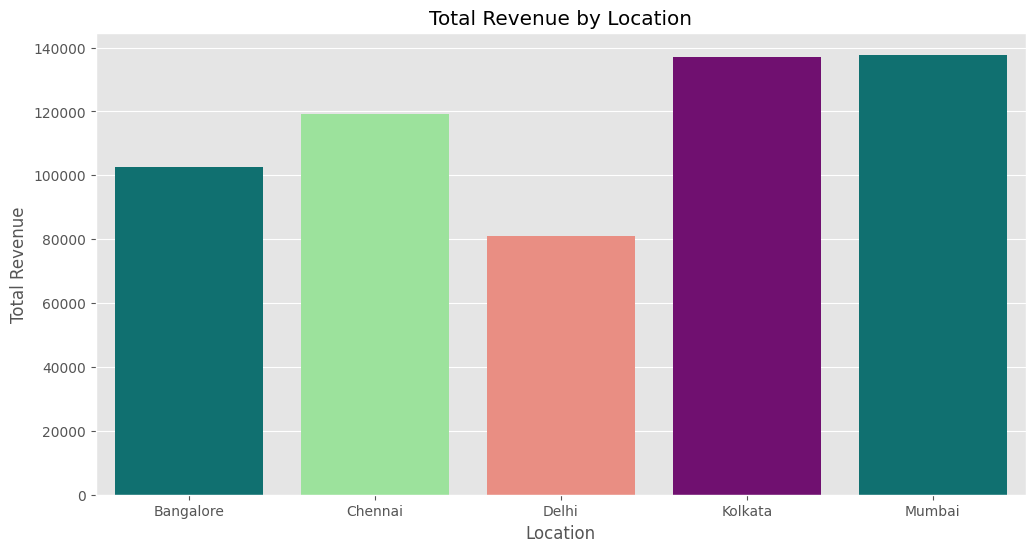

In [94]:
sns.barplot(data = location_analysis, x = 'Location', y = 'Total Revenue', palette = ['teal', 'lightgreen', 'salmon', 'purple'])
plt.xlabel('Location')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Location')
plt.savefig('Total_Revenue_by_Location.png')
plt.show()

<ipython-input-95-4778f2a060a1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = location_analysis, x = 'Location', y = 'Total Order Quantity', palette = ['teal', 'lightgreen', 'salmon', 'purple'])
<ipython-input-95-4778f2a060a1>:1: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data = location_analysis, x = 'Location', y = 'Total Order Quantity', palette = ['teal', 'lightgreen', 'salmon', 'purple'])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-package

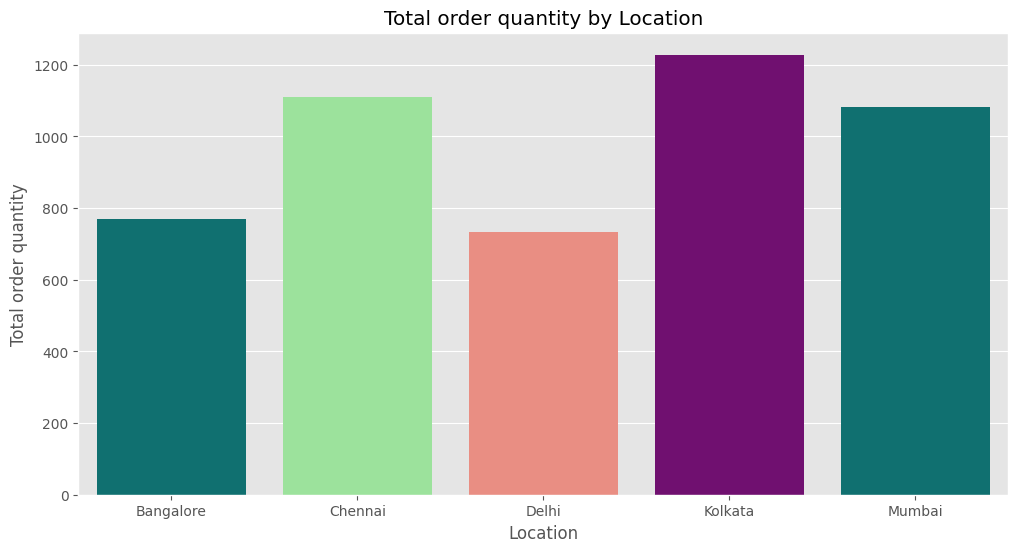

In [95]:
sns.barplot(data = location_analysis, x = 'Location', y = 'Total Order Quantity', palette = ['teal', 'lightgreen', 'salmon', 'purple'])
plt.xlabel('Location')
plt.ylabel('Total order quantity')
plt.title('Total order quantity by Location')
plt.savefig('Total_Order_quantity_by_Location.png')
plt.show()

<ipython-input-96-4f87d97307f2>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=location_analysis, x='Location', y='Average Defect Rate', palette=['teal', 'lightgreen', 'salmon', 'purple'])
<ipython-input-96-4f87d97307f2>:10: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=location_analysis, x='Location', y='Average Defect Rate', palette=['teal', 'lightgreen', 'salmon', 'purple'])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.

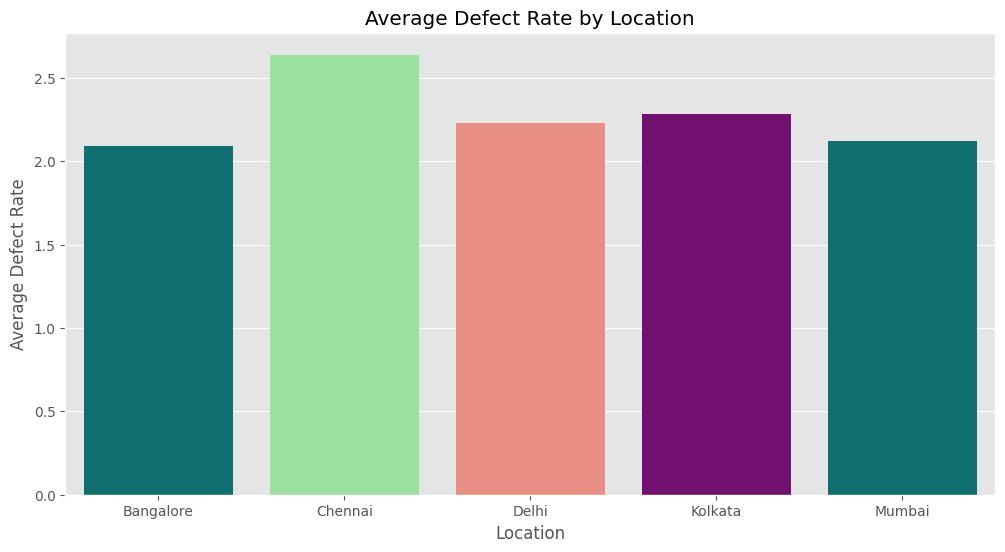

<ipython-input-96-4f87d97307f2>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=location_analysis, x='Location', y='Average Lead Time', palette=['teal', 'lightgreen', 'salmon', 'purple'])
<ipython-input-96-4f87d97307f2>:18: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=location_analysis, x='Location', y='Average Lead Time', palette=['teal', 'lightgreen', 'salmon', 'purple'])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:9

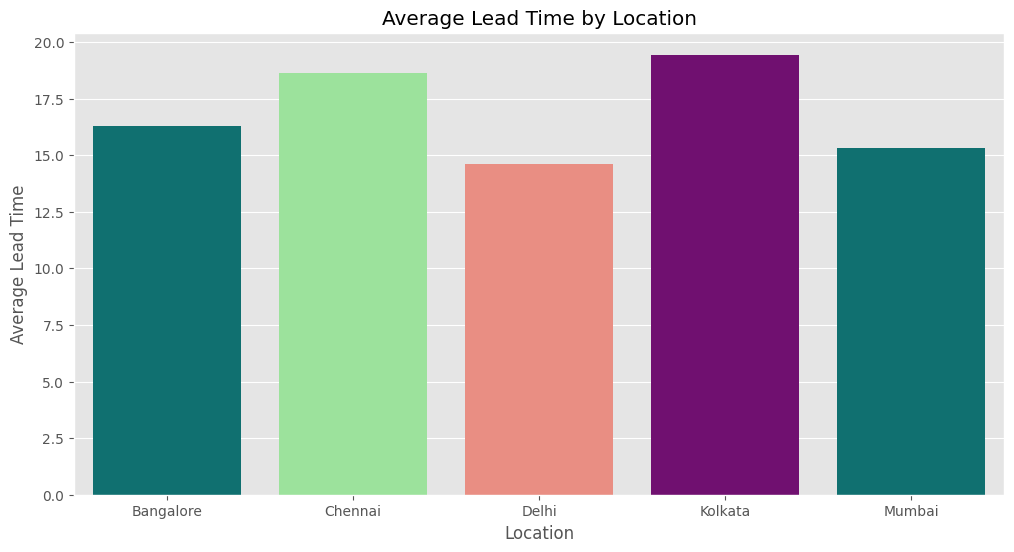

<ipython-input-96-4f87d97307f2>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=location_analysis, x='Location', y='Average Shipping Cost', palette=['teal', 'lightgreen', 'salmon', 'purple'])
<ipython-input-96-4f87d97307f2>:26: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=location_analysis, x='Location', y='Average Shipping Cost', palette=['teal', 'lightgreen', 'salmon', 'purple'])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_b

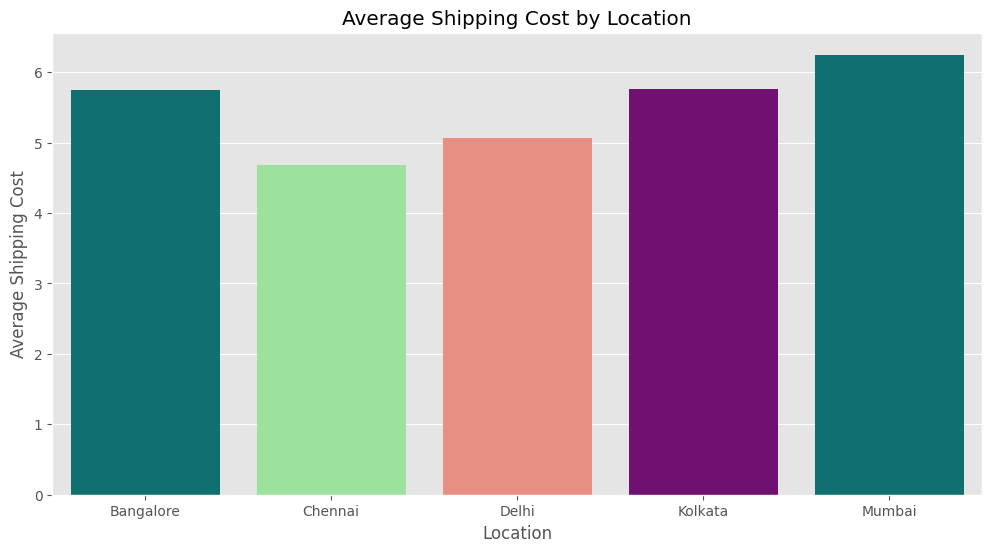

In [96]:
# Average Defect Rate by Location
sns.barplot(data=location_analysis, x='Location', y='Average Defect Rate', palette=['teal', 'lightgreen', 'salmon', 'purple'])
plt.xlabel('Location')
plt.ylabel('Average Defect Rate')
plt.title('Average Defect Rate by Location')
plt.savefig('Average_Defect_Rate_by_Location.png')
plt.show()

# Average Lead Time by Location
sns.barplot(data=location_analysis, x='Location', y='Average Lead Time', palette=['teal', 'lightgreen', 'salmon', 'purple'])
plt.xlabel('Location')
plt.ylabel('Average Lead Time')
plt.title('Average Lead Time by Location')
plt.savefig('Average_Lead_Time_by_Location.png')
plt.show()

# Average Shipping Cost by Location
sns.barplot(data=location_analysis, x='Location', y='Average Shipping Cost', palette=['teal', 'lightgreen', 'salmon', 'purple'])
plt.xlabel('Location')
plt.ylabel('Average Shipping Cost')
plt.title('Average Shipping Cost by Location')
plt.savefig('Average_Shipping_Cost_by_Location.png')
plt.show()


In [97]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

### SKU

There’s a column in the dataset as SKUs. You must have heard it for the very first time. So, SKU stands for Stock Keeping Units. They’re like special codes that help companies keep track of all the different things they have for sale. Imagine you have a large toy store with lots of toys. Each toy is different and has its name and price, but when you want to know how many you have left, you need a way to identify them. So you give each toy a unique code, like a secret number only the store knows. This secret number is called SKU.

In [100]:
df['SKU'].unique()

array(['SKU0', 'SKU1', 'SKU2', 'SKU3', 'SKU4', 'SKU5', 'SKU6', 'SKU7',
       'SKU8', 'SKU9', 'SKU10', 'SKU11', 'SKU12', 'SKU13', 'SKU14',
       'SKU15', 'SKU16', 'SKU17', 'SKU18', 'SKU19', 'SKU20', 'SKU21',
       'SKU22', 'SKU23', 'SKU24', 'SKU25', 'SKU26', 'SKU27', 'SKU28',
       'SKU29', 'SKU30', 'SKU31', 'SKU32', 'SKU33', 'SKU34', 'SKU35',
       'SKU36', 'SKU37', 'SKU38', 'SKU39', 'SKU40', 'SKU41', 'SKU42',
       'SKU43', 'SKU44', 'SKU45', 'SKU46', 'SKU47', 'SKU48', 'SKU49',
       'SKU50', 'SKU51', 'SKU52', 'SKU53', 'SKU54', 'SKU55', 'SKU56',
       'SKU57', 'SKU58', 'SKU59', 'SKU60', 'SKU61', 'SKU62', 'SKU63',
       'SKU64', 'SKU65', 'SKU66', 'SKU67', 'SKU68', 'SKU69', 'SKU70',
       'SKU71', 'SKU72', 'SKU73', 'SKU74', 'SKU75', 'SKU76', 'SKU77',
       'SKU78', 'SKU79', 'SKU80', 'SKU81', 'SKU82', 'SKU83', 'SKU84',
       'SKU85', 'SKU86', 'SKU87', 'SKU88', 'SKU89', 'SKU90', 'SKU91',
       'SKU92', 'SKU93', 'SKU94', 'SKU95', 'SKU96', 'SKU97', 'SKU98',
       'SKU99'], dtyp

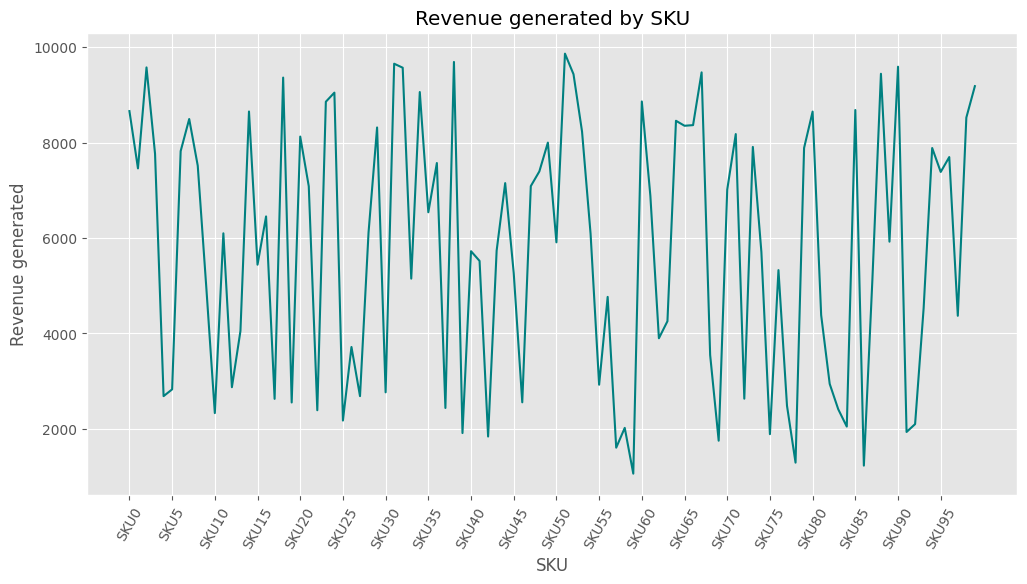

<Figure size 3000x400 with 0 Axes>

In [114]:
sns.lineplot(data = df, x = 'SKU', y = 'Revenue generated', color = 'teal')
plt.xticks(ticks=np.arange(0, len(df), step=5), rotation = 60)
plt.xlabel('SKU')
plt.ylabel('Revenue generated')
plt.title('Revenue generated by SKU')
plt.figure(figsize = (30,4))
# plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.savefig('Revenue_generated_by_SKU.png')
plt.show()



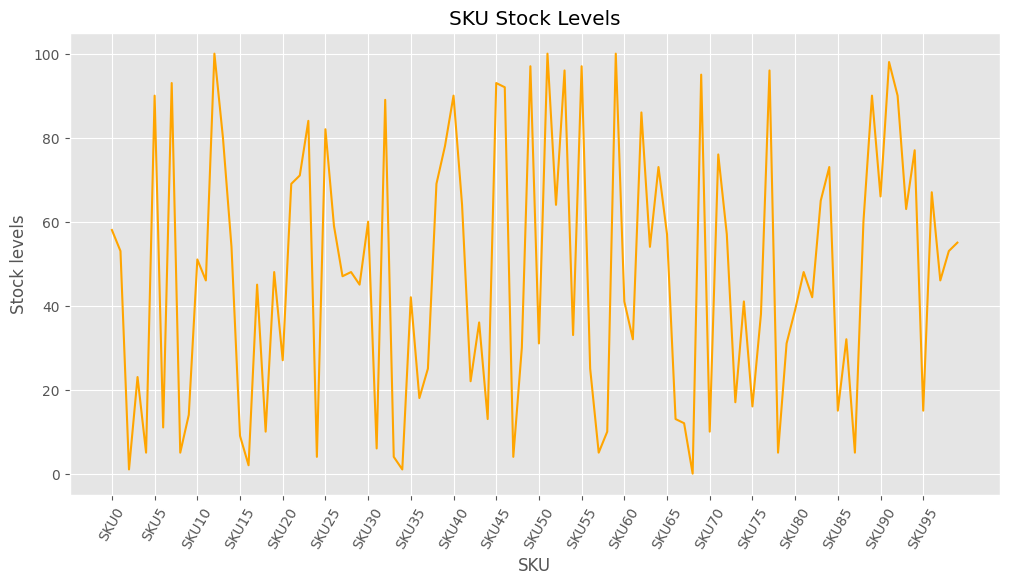

In [113]:
sns.lineplot(data = df, x = 'SKU', y = 'Stock levels', color = 'orange')
plt.xticks(ticks=np.arange(0, len(df), step=5), rotation = 60)
plt.ylabel('Stock levels')
plt.title('SKU Stock Levels')
plt.xlabel('SKU')
plt.savefig('Stock_levels_by_SKU.png')
plt.show()


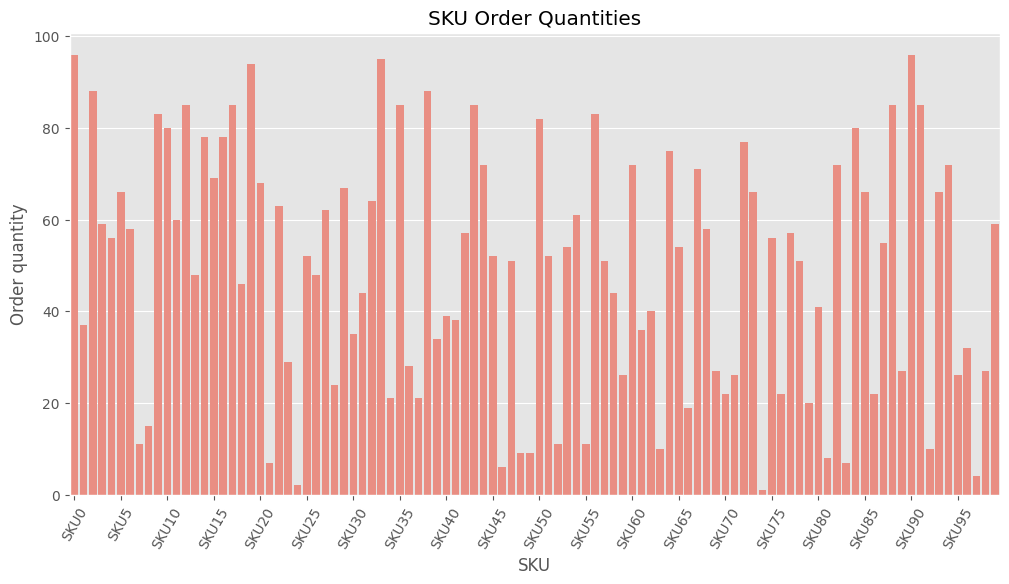

<Figure size 3000x400 with 0 Axes>

In [117]:
sns.barplot(data = df, x = 'SKU', y = 'Order quantities', color = 'salmon')
plt.xticks(ticks=np.arange(0, len(df), step=5), rotation = 60)
plt.ylabel('Order quantity')
plt.title('SKU Order Quantities')
plt.xlabel('SKU')
plt.figure(figsize = (30,4))
plt.savefig('Order_quantities_by_SKU.png')
plt.show()

In [118]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [119]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


### Transportation modes

In [126]:
df['Transportation modes'].value_counts()

,count
Transportation modes,
Road,29
Rail,28
Air,26
Sea,17


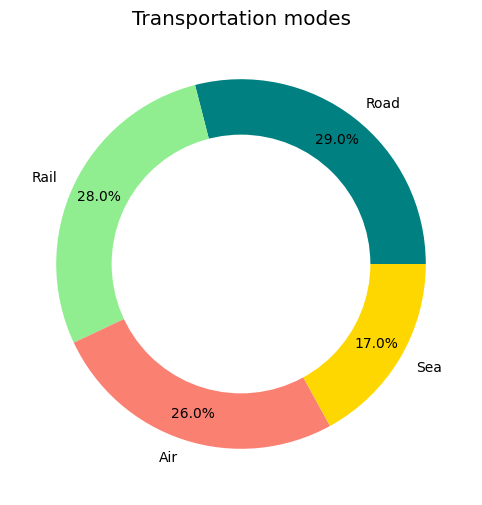

In [129]:
plt.pie(x = df['Transportation modes'].value_counts(), labels = df['Transportation modes'].value_counts().index, autopct = '%1.1f%%', pctdistance=0.85, colors = ['teal', 'lightgreen', 'salmon', 'gold'])

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.title('Transportation modes')
plt.savefig('Transportation_modes.png')
plt.show()

In [130]:
transportation_analysis = df.groupby('Transportation modes').agg({
    'Revenue generated': 'sum',
    'Defect rates': 'mean',
    'Lead time': 'mean',
    'Shipping costs': 'mean'
}).reset_index()

In [132]:
transportation_analysis = transportation_analysis.rename(columns={
    'Revenue generated': 'Total Revenue',
    'Defect rates': 'Average Defect Rate',
    'Lead time': 'Average Lead Time',
    'Shipping costs': 'Average Shipping Cost'
})


<ipython-input-133-bcafc0f0e6b7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=transportation_analysis, x='Transportation modes', y='Total Revenue', palette=['teal', 'lightgreen', 'salmon', 'purple'])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/di

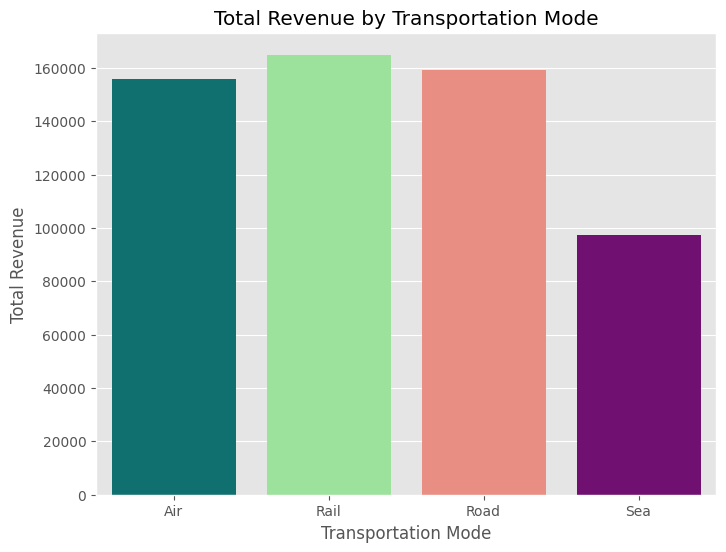

<ipython-input-133-bcafc0f0e6b7>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=transportation_analysis, x='Transportation modes', y='Average Defect Rate', palette=['teal', 'lightgreen', 'salmon', 'purple'])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python

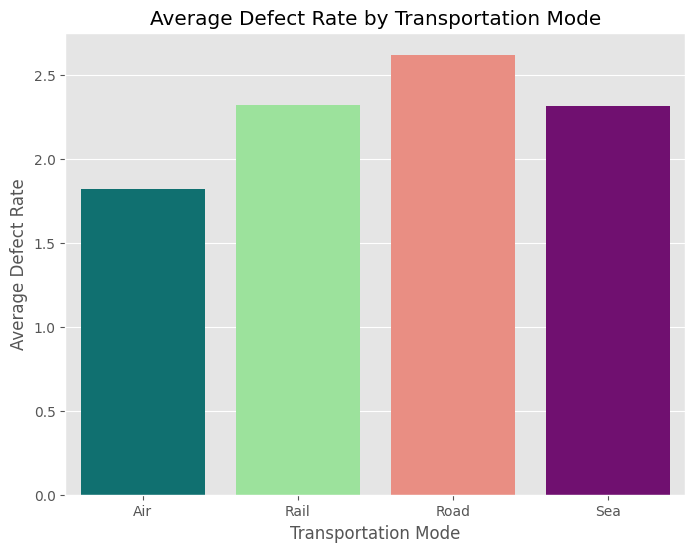

<ipython-input-133-bcafc0f0e6b7>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=transportation_analysis, x='Transportation modes', y='Average Lead Time', palette=['teal', 'lightgreen', 'salmon', 'purple'])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.

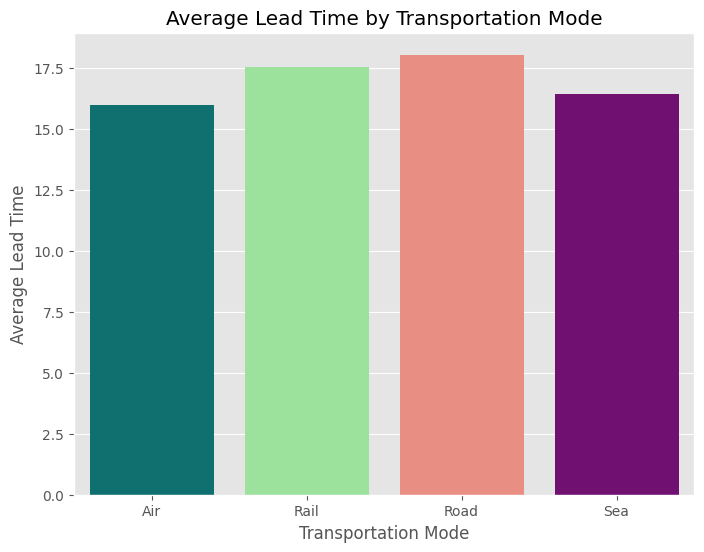

<ipython-input-133-bcafc0f0e6b7>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=transportation_analysis, x='Transportation modes', y='Average Shipping Cost', palette=['teal', 'lightgreen', 'salmon', 'purple'])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/pyth

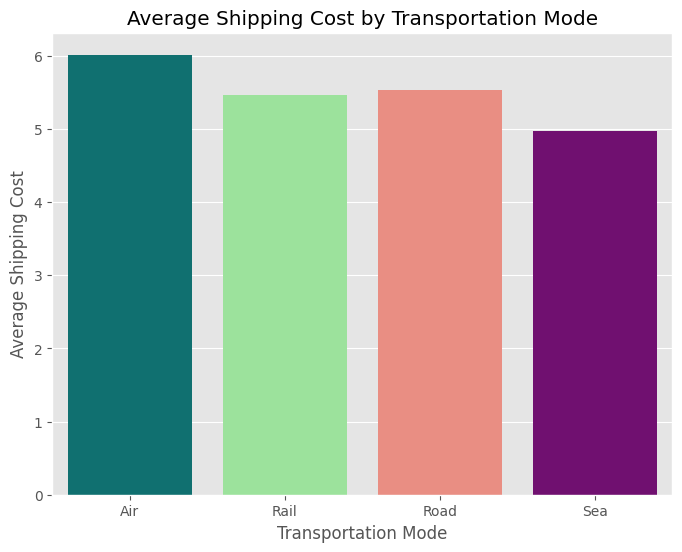

In [133]:
# Total Revenue by Transportation Mode
plt.figure(figsize=(8, 6))
sns.barplot(data=transportation_analysis, x='Transportation modes', y='Total Revenue', palette=['teal', 'lightgreen', 'salmon', 'purple'])
plt.xlabel('Transportation Mode')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Transportation Mode')
plt.savefig('Total_Revenue_by_Transportation_Mode.png')
plt.show()

# Average Defect Rate by Transportation Mode
plt.figure(figsize=(8, 6))
sns.barplot(data=transportation_analysis, x='Transportation modes', y='Average Defect Rate', palette=['teal', 'lightgreen', 'salmon', 'purple'])
plt.xlabel('Transportation Mode')
plt.ylabel('Average Defect Rate')
plt.title('Average Defect Rate by Transportation Mode')
plt.savefig('Average_Defect_Rate_by_Transportation_Mode.png')
plt.show()

# Average Lead Time by Transportation Mode
plt.figure(figsize=(8, 6))
sns.barplot(data=transportation_analysis, x='Transportation modes', y='Average Lead Time', palette=['teal', 'lightgreen', 'salmon', 'purple'])
plt.xlabel('Transportation Mode')
plt.ylabel('Average Lead Time')
plt.title('Average Lead Time by Transportation Mode')
plt.savefig('Average_Lead_Time_by_Transportation_Mode.png')
plt.show()

# Average Shipping Cost by Transportation Mode
plt.figure(figsize=(8, 6))
sns.barplot(data=transportation_analysis, x='Transportation modes', y='Average Shipping Cost', palette=['teal', 'lightgreen', 'salmon', 'purple'])
plt.xlabel('Transportation Mode')
plt.ylabel('Average Shipping Cost')
plt.title('Average Shipping Cost by Transportation Mode')
plt.savefig('Average_Shipping_Cost_by_Transportation_Mode.png')
plt.show()


### Routes

In [134]:
df['Routes'].value_counts()

,count
Routes,
Route A,43
Route B,37
Route C,20


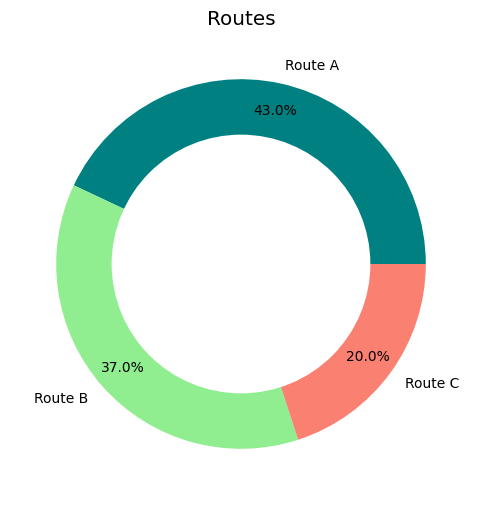

In [141]:
plt.pie(x = df['Routes'].value_counts(), labels = df['Routes'].value_counts().index, autopct = '%1.1f%%', pctdistance=0.85, colors = ['teal', 'lightgreen', 'salmon', 'gold'])

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.title('Routes')
plt.savefig('Routes.png')
plt.show()

In [142]:
route_analysis = df.groupby('Routes').agg({
    'Revenue generated': 'sum',
    'Defect rates': 'mean',
    'Lead time': 'mean',
    'Shipping costs': 'mean'
}).reset_index()

<ipython-input-143-da069b3d6dd2>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=route_analysis, x='Routes', y='Total Revenue', palette=['teal', 'lightgreen', 'salmon', 'purple'])
<ipython-input-143-da069b3d6dd2>:12: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(data=route_analysis, x='Routes', y='Total Revenue', palette=['teal', 'lightgreen', 'salmon', 'purple'])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 

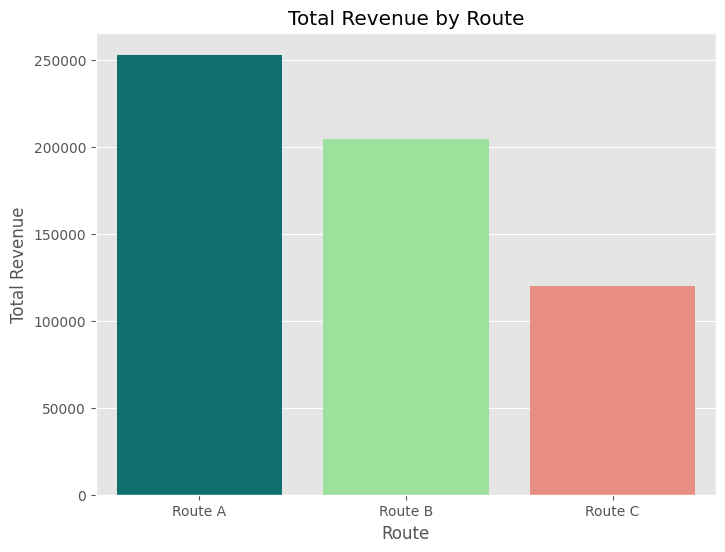

<ipython-input-143-da069b3d6dd2>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=route_analysis, x='Routes', y='Average Defect Rate', palette=['teal', 'lightgreen', 'salmon', 'purple'])
<ipython-input-143-da069b3d6dd2>:21: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(data=route_analysis, x='Routes', y='Average Defect Rate', palette=['teal', 'lightgreen', 'salmon', 'purple'])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with

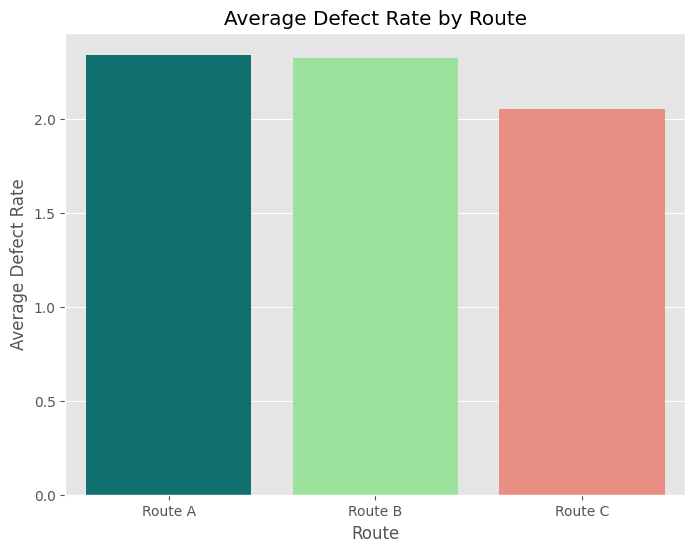

<ipython-input-143-da069b3d6dd2>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=route_analysis, x='Routes', y='Average Lead Time', palette=['teal', 'lightgreen', 'salmon', 'purple'])
<ipython-input-143-da069b3d6dd2>:30: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(data=route_analysis, x='Routes', y='Average Lead Time', palette=['teal', 'lightgreen', 'salmon', 'purple'])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a l

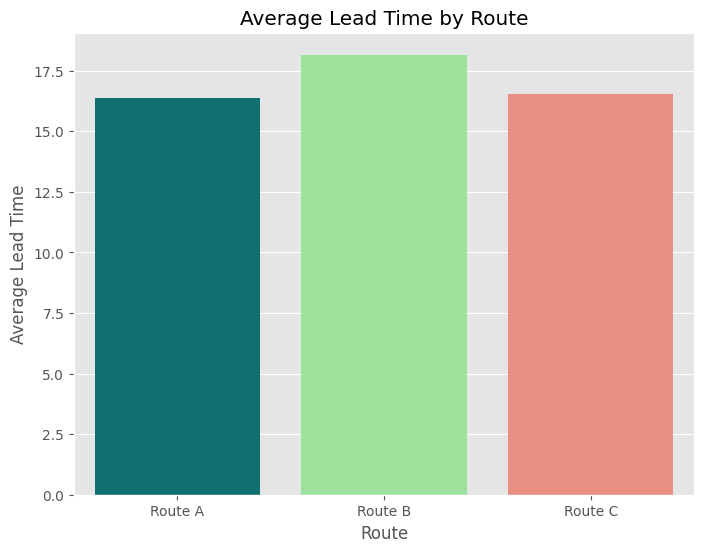

<ipython-input-143-da069b3d6dd2>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=route_analysis, x='Routes', y='Average Shipping Cost', palette=['teal', 'lightgreen', 'salmon', 'purple'])
<ipython-input-143-da069b3d6dd2>:39: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(data=route_analysis, x='Routes', y='Average Shipping Cost', palette=['teal', 'lightgreen', 'salmon', 'purple'])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping 

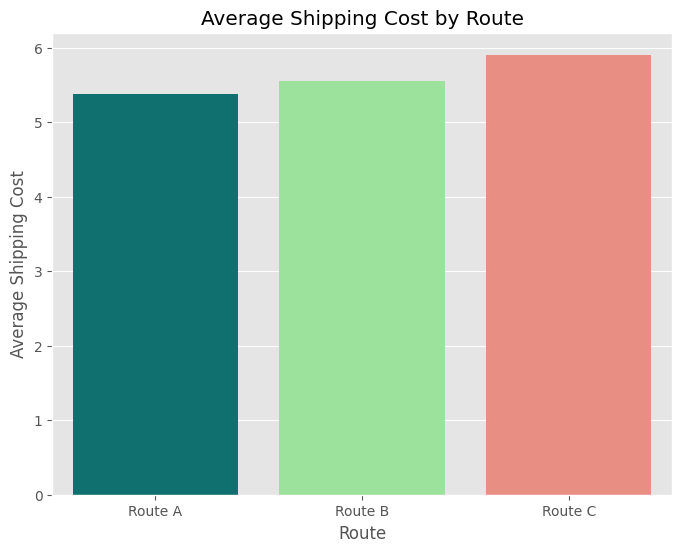

In [143]:
route_analysis = route_analysis.rename(columns={
    'Revenue generated': 'Total Revenue',
    'Defect rates': 'Average Defect Rate',
    'Lead time': 'Average Lead Time',
    'Shipping costs': 'Average Shipping Cost'
})

# Total Revenue by Route
plt.figure(figsize=(8, 6))
sns.barplot(data=route_analysis, x='Routes', y='Total Revenue', palette=['teal', 'lightgreen', 'salmon', 'purple'])
plt.xlabel('Route')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Route')
plt.savefig('Total_Revenue_by_Route.png')
plt.show()

# Average Defect Rate by Route
plt.figure(figsize=(8, 6))
sns.barplot(data=route_analysis, x='Routes', y='Average Defect Rate', palette=['teal', 'lightgreen', 'salmon', 'purple'])
plt.xlabel('Route')
plt.ylabel('Average Defect Rate')
plt.title('Average Defect Rate by Route')
plt.savefig('Average_Defect_Rate_by_Route.png')
plt.show()

# Average Lead Time by Route
plt.figure(figsize=(8, 6))
sns.barplot(data=route_analysis, x='Routes', y='Average Lead Time', palette=['teal', 'lightgreen', 'salmon', 'purple'])
plt.xlabel('Route')
plt.ylabel('Average Lead Time')
plt.title('Average Lead Time by Route')
plt.savefig('Average_Lead_Time_by_Route.png')
plt.show()

# Average Shipping Cost by Route
plt.figure(figsize=(8, 6))
sns.barplot(data=route_analysis, x='Routes', y='Average Shipping Cost', palette=['teal', 'lightgreen', 'salmon', 'purple'])
plt.xlabel('Route')
plt.ylabel('Average Shipping Cost')
plt.title('Average Shipping Cost by Route')
plt.savefig('Average_Shipping_Cost_by_Route.png')
plt.show()


## Downloading the results

In [145]:
!zip -r results.zip *.png *.csv

  adding: Average_Defect_Rate_by_Location.png (deflated 25%)
  adding: Average_Defect_Rate_by_Route.png (deflated 21%)
  adding: Average_Defect_Rate_by_Transportation_Mode.png (deflated 20%)
  adding: Average_defect_rate_for_product_type.png (deflated 25%)
  adding: Average_Lead_Time_by_Location.png (deflated 24%)
  adding: Average_Lead_Time_by_Route.png (deflated 22%)
  adding: Average_Lead_Time_by_Transportation_Mode.png (deflated 21%)
  adding: Average_lead_time_for_product_type.png (deflated 24%)
  adding: Average_manufacture_cost_for_product_type.png (deflated 23%)
  adding: Average_Shipping_Cost_by_Location.png (deflated 25%)
  adding: Average_Shipping_Cost_by_Route.png (deflated 21%)
  adding: Average_Shipping_Cost_by_Transportation_Mode.png (deflated 20%)
  adding: Customer_demographics.png (deflated 27%)
  adding: Location.png (deflated 29%)
  adding: Order_quantities_by_SKU.png (deflated 95%)
  adding: Price_vs_Revenue_generated.png (deflated 7%)
  adding: Product_type_distri